# Evolution des Adolf / Adolph / Adolphe en France entre 1900 et 2017

Y-a-t'il encore des Français prenommés Adolf en France ? Depuis la fin de l'Occupation et de la Seconde Guerre Mondial, on serait tentés de dire non. A partir de cette question (aparemment idiote), je suis allée vérifier sur le répertoire de l'INSEE pour trouver une réponse à cette question qui me taraudait l'esprit. 
L'Institut National de la Statistique et des Etudes Economiques met à disposition le Fichier des prénoms sur son site : https://www.insee.fr/fr/statistiques/2540004 issu de l'état civil. Ce fichier "contient des données sur les prénoms attribués aux enfants nés en France entre 1900 et 2017. Ces données sont disponibles au niveau France et par département."

In [1]:
import os
import pandas as pd
prenoms = pd.read_csv("nat2017.txt", sep='\t')

Remarque spéciale concernant les années sans beaucoup d'Adolphiens. Selon la documentation du fichier : 
2. Sur la période allant de 1946 à 2017, le prénom a été attribué au moins 20 fois à des personnes de sexe féminin et/ou au moins 20 fois à des personnes de sexe masculin
3. Pour une année de naissance donnée, le prénom a été attribué au moins 3 fois à des personnes de sexe féminin ou de sexe masculin
Les effectifs des prénoms remplissant la condition 2 mais pas la condition 3 sont regroupés (pour chaque sexe et chaque prénom) dans un enregistrement dont le champ année de naissance (ANNAIS) prend la valeur «XXXX».

Suite à un test rapide, la non intégration de ces individus n'impacte pas ma petite étude. Pour un affichage plus clair dans les graphiques, on les excluera.

In [2]:
prenoms = prenoms[prenoms.annais != 'XXXX']
prenoms_garcons = prenoms[prenoms.sexe == 1]

Trois prénoms commencent "ADOL*" : Adolf (origine allemande), Adolph (origine allemande ), Adolphe (version française). On se penchera sur l'évolution de ces trois prénoms.

In [3]:
adolf = prenoms_garcons[prenoms_garcons['preusuel'] == "ADOLF"].sort_values(by='annais', axis=0, ascending=True)
adolph = prenoms_garcons[prenoms_garcons['preusuel'] == "ADOLPH"].sort_values(by='annais', axis=0, ascending=True)
adolphe = prenoms_garcons[prenoms_garcons['preusuel'] == "ADOLPHE"].sort_values(by='annais', axis=0, ascending=True)

In [4]:
print("Adolf : " +str(len(adolf)))
print("Dernière naissance : " )
print(adolf.tail(1).annais)
print("Adolph : " +str(len(adolph)))
print("Dernière naissance : " )
print(adolph.tail(1).annais)
print("Adolphe : " +str(len(adolphe)))
print("Dernière naissance : " )
print(adolphe.tail(1).annais)

Adolf : 9
Dernière naissance : 
7879    1944
Name: annais, dtype: object
Adolph : 8
Dernière naissance : 
7913    1915
Name: annais, dtype: object
Adolphe : 97
Dernière naissance : 
8011    2007
Name: annais, dtype: object


Quick reactions : 
- Adolphe est certainement plus populaire en France que Adolf ou Adolph, puisqu'il s'agit de la version française (avec "e" à la fin) du prénom.
- Qui a appelé son fils Adolf avec "f" en 1944 ?!

And last but not less important : 
- Qui appelle encore son fils Adolphe en 2007 ?!

## Graphiques, graphiques !

Nous allons représenter les naissances avec la bibliothèque Matplot.

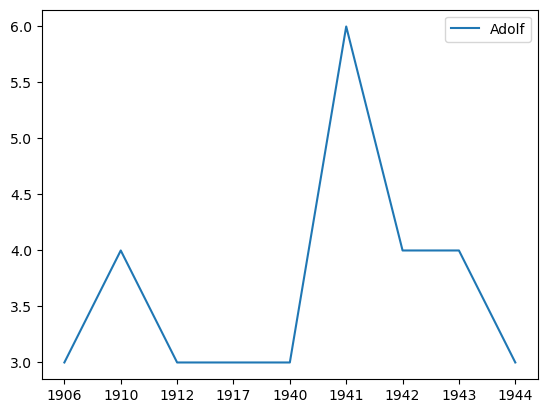

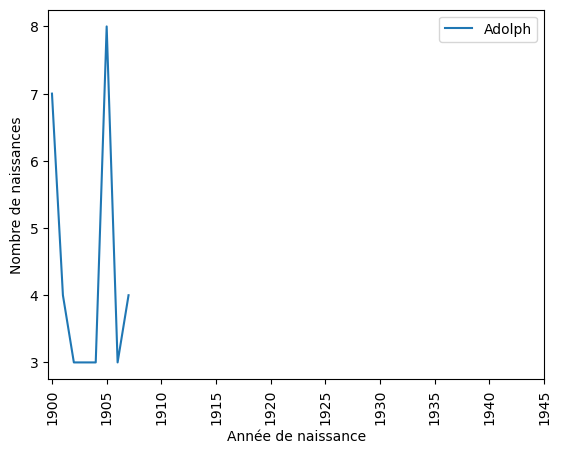

In [7]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot(adolf.annais, adolf.nombre, label='Adolf')
plt.legend()
plt.show()
plt.xticks(np.arange(0,50,1),np.arange(1900,1950,1),rotation=90)
plt.ylabel('Nombre de naissances')
plt.xlabel('Année de naissance')

plt.plot(adolph.annais, adolph.nombre, label='Adolph')
plt.legend()
plt.xticks(np.arange(0,50,5),np.arange(1900,1950,5),rotation=90)

plt.ylabel('Nombre de naissances')
plt.xlabel('Année de naissance')
plt.show()

Les Français ont cessé d'appeler leurs enfants "Adolf" entre 1912 et 1941, lors de la Première Guerre Mondiale et après la Seconde Guerre Mondiale. Le pic d'Adolf a eu lieu en 1941, juste après l'Occupation allemande. 

Voyons de plus près l'évolution de la version française du prénom, Adolphe. 

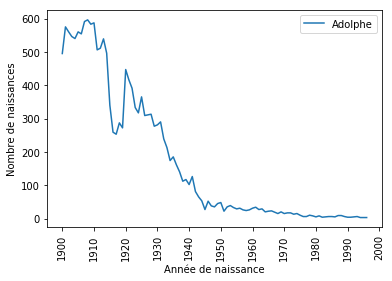

In [387]:
import numpy as np
plt.plot(adolphe.annais, adolphe.nombre, label='Adolphe')
plt.xticks(np.arange(0,107,10),np.arange(1900,2017,10),rotation=90)
plt.ylabel('Nombre de naissances')
plt.xlabel('Année de naissance')
plt.legend()
plt.show()

Un grande chute encore une fois, pendant la Première Guerre Mondiale, et après la Seconde Guerre Mondiale.

In [388]:
print("Adolphes après 1945 : " + str(adolphe.nombre[adolphe.annais.astype(int) > 1945].sum()))
print("Adolphes avant 1945 : " + str(adolphe.nombre[adolphe.annais.astype(int) < 1945].sum()))
print("Adolphes en 1945 : " + str(adolphe.nombre[adolphe.annais.astype(int) == 1945].sum()))

Adolphes après 1945 : 931
Adolphes avant 1945 : 15468
Adolphes en 1945 : 27


Après la fin de la Seconde Guerre Mondiale, on comptabilise 713 nouveaux-nés prenommés Adolphe, contre 15 665 auparavant. 

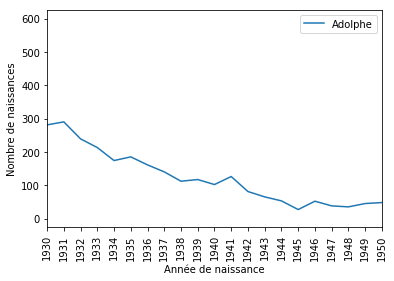

In [389]:
plt.plot(adolphe.annais, adolphe.nombre, label='Adolphe')
plt.xlim(1930,1950)
plt.xticks(rotation=90)
plt.ylabel('Nombre de naissances')
plt.xlabel('Année de naissance')
plt.legend()
plt.show()

En fait, entre 1930 et 1950, on est passés de presque 300 Adolphes nés par an, à 27.